In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Multiple Linear Regression 
is a supervised learning algorithm used in machine learning to predict a continuous dependent variable based on two or more independent variables. It extends simple linear regression by considering multiple predictors.

## 1:00

In [6]:
from sklearn.datasets import load_diabetes

In [11]:
dibt = load_diabetes()

In [13]:
dibt.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [17]:
dibt.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

# 3:50

## Problem Statement : To Predict the disease progression One Year after the baseline 

# 6:00
## Making a Dataframe for the dataset

In [30]:
data = pd.DataFrame(dibt.data, columns=dibt.feature_names)
data["Target"] = dibt.target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


# 7:15
### EDA
### Feature engineering 
### Data Cleaning 
### Data Preparation

In [138]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4   

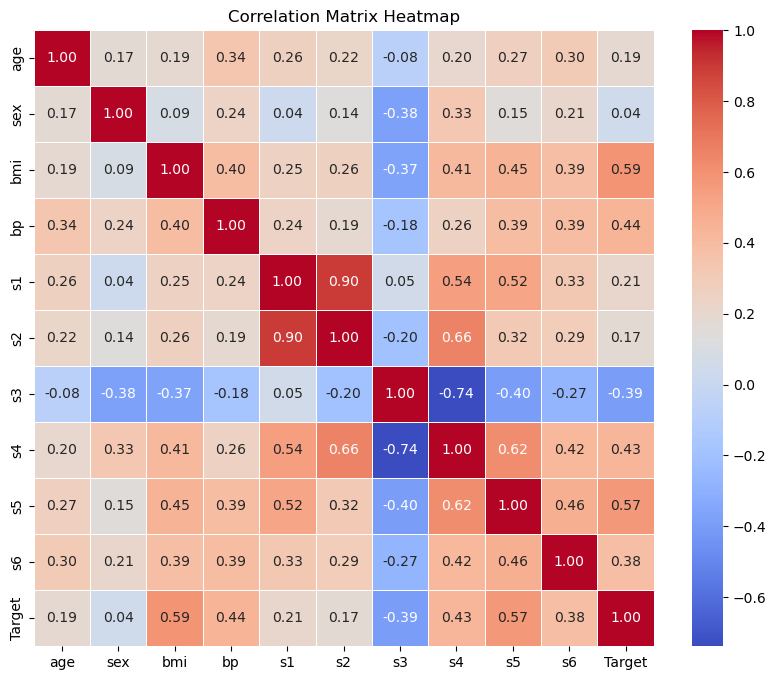

In [140]:

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

<Figure size 1200x1000 with 0 Axes>

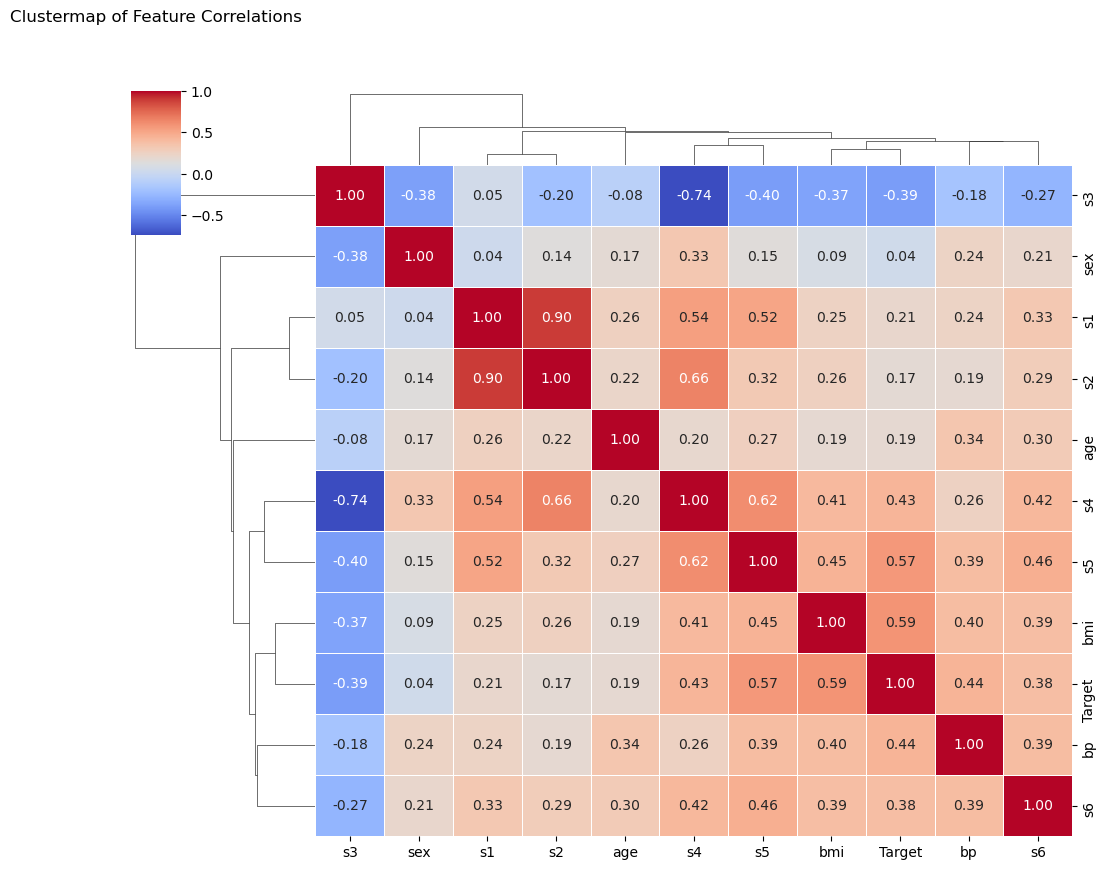

In [142]:
# Plotting the clustermap
plt.figure(figsize=(12, 10))
sns.clustermap(
    correlation_matrix,
    annot=True,  # Display correlation values on the map
    cmap='coolwarm',  # Color map for the heatmap
    fmt=".2f",  # Formatting for the annotations
    linewidths=0.5,  # Width of the grid lines
    figsize=(10, 8),  # Size of the plot
    dendrogram_ratio=(.2, .1),  # Adjust dendrogram size ratio
)

plt.title("Clustermap of Feature Correlations", pad=50)  # Add a title
plt.show()

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Adding a constant column for intercept in the calculation
X = add_constant(data)  # Adds an intercept term

# Calculating VIF scores for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying VIF scores
print("Variance Inflation Factor (VIF) Scores:")
print(vif_data)

Variance Inflation Factor (VIF) Scores:
   Feature        VIF
0    const   9.093376
1      age   1.217386
2      sex   1.323571
3      bmi   1.723237
4       bp   1.542677
5       s1  59.698989
6       s2  39.373182
7       s3  15.410233
8       s4   8.915790
9       s5  10.522501
10      s6   1.488241
11  Target   2.073606


# 7:45
## Seperate the Data into x and y

In [40]:
features = dibt.feature_names

In [44]:
X = data[features]
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [58]:
Target = dibt.target
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [66]:
y = data["Target"]       

## 8:53

In [83]:

## Splitting the data X and data y into train and test data 
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [87]:
## 10:20
# Scaling the daata 
#This is alaread scaled data that means it is already standardizedd data

# 10:31

In [90]:
## Training the model on Linear regression algorythm
from sklearn.linear_model import LinearRegression

In [92]:
L_reg = LinearRegression()

In [96]:
L_reg_model = L_reg.fit(X_train,y_train)

In [102]:
print(L_reg_model.coef_)


[ -30.62219046 -272.2506057   528.85252681  327.69716891 -581.01973841
  332.97061365  -27.97314298  139.28036115  665.07667773   61.90517166]


In [104]:
print(L_reg_model.intercept_)

151.4300932966009


# 14:19

In [109]:
y_pred_test = L_reg_model.predict(X_test)
print(y_pred_test)

[119.14235853 110.77183282 185.03750644  68.00997114 171.05444208
 190.41916188 218.59009744 119.63375975 157.26867822 129.50082172
 214.15123432 202.9228174   88.41924038  71.96523457 236.88645879
 206.09667095 175.60536299 101.96502781 114.10950995 169.04562492
 187.71464103  85.64466706 144.1354953  107.06903899  94.04844034
 211.79832988  90.72839769 176.23084464 122.62288816 180.92495472
 157.11598543 138.04315918 192.36322448  94.45469648 166.30860041
 189.43644667 110.67690284 247.6779722  172.47370249 188.08959083
 160.08451415 176.65318031 115.81198266 120.23187992 141.5360933
 203.4072105  152.43166715 144.09802539 190.18999626 191.4950697
  59.81227803 159.75688911 102.14767931 147.89042458 186.10407036
 121.41211882 159.12303468  83.43835172  55.57818196  79.08303804
  99.4572998  199.89514677 168.54643127 109.16305633 276.41546587
  76.51059696  74.13709552 167.99007114 198.23092034  58.7775995
 163.54941204  87.43623443  89.56957705 135.79451579 158.77561923
  94.27258269

# 14:45

In [112]:
# Evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [118]:
mse = mean_squared_error(y_test,y_pred_test)
print(mse)

2992.581229301017


In [130]:
from sklearn.metrics import r2_score


r2_s = r2_score(y_test, y_pred_test)  
print(f"R-squared Score: {r2_s}")


R-squared Score: 0.4384316213369279


In [134]:
mae = mean_absolute_error(y_test,y_pred_test)
print(mae)

41.97492114949366


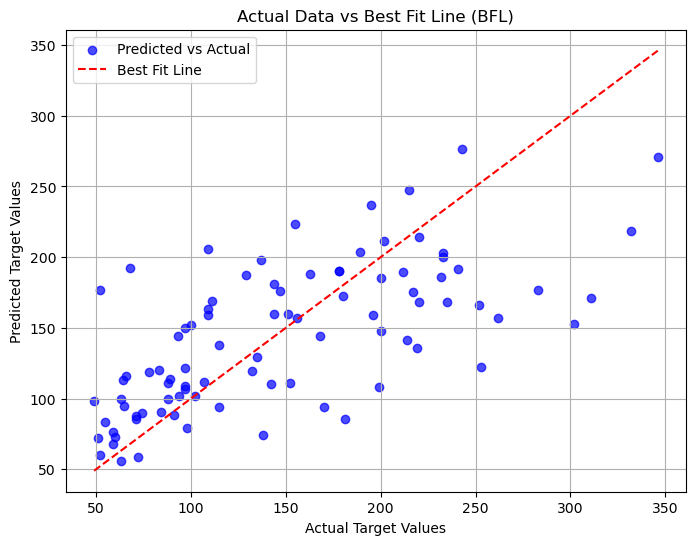

In [136]:
# Scatter plot for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Best Fit Line')
plt.title("Actual Data vs Best Fit Line (BFL)")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.legend()
plt.grid(True)
plt.show()